In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In this part of the code I will manipulate the data to see how can I work with this dataset

In [4]:
#load data
quart = pd.read_excel('../Data/raman.xlsx', sheet_name='quartzo') #quartz 45 ccw 
gold = pd.read_excel('../Data/raman.xlsx', sheet_name='gold') #gold 785 nm
kh2po4 = pd.read_excel('../Data/raman.xlsx', sheet_name='KH2PO4')#KH2PO4 (Potassium Dihydrogen Phosphate R120165) 780 nm
iron = pd.read_excel('../Data/raman.xlsx', sheet_name='iron')#Iron 785 nm
diamond = pd.read_excel('../Data/raman.xlsx', sheet_name='diamante')#diamante 45 ccw

Now I will concatenate those diferents data frames into a only one pandas data frame with intesity and raman shift as columns and the minerals as lines 

In [5]:
data = {'Gold':gold['Intensity'][0:800],'Quartz':quart['Intensity'][0:800],
        'Potassium Dihydrogen':kh2po4['Intensity'][0:800],'Iron':iron['Intensity'][0:800],
       'Diamond':diamond['Intensity'][0:800]}
#here I am creating a data frame with the intensities from the minerals
#The reason is that I am trying to analyse some correlation with those intensities 

In [6]:
df = pd.DataFrame(data, columns=['Gold','Quartz','Potassium Dihydrogen','Iron','Diamond'])  

In [7]:
df.isna().sum()

Gold                    0
Quartz                  0
Potassium Dihydrogen    0
Iron                    0
Diamond                 0
dtype: int64

In [8]:
df.corr()

,Gold,Quartz,Potassium Dihydrogen,Iron,Diamond
Gold,1.000000,0.083390,0.152664,0.402838,-0.072287
Quartz,0.083390,1.000000,0.071531,0.077418,-0.072839
Potassium Dihydrogen,0.152664,0.071531,1.000000,0.392482,-0.044923
Iron,0.402838,0.077418,0.392482,1.000000,-0.092914
Diamond,-0.072287,-0.072839,-0.044923,-0.092914,1.000000


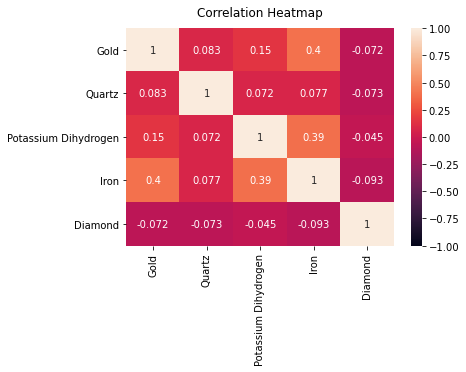

In [9]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

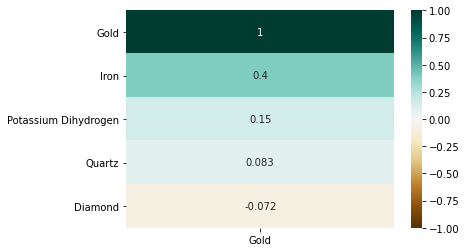

In [10]:
heatmap = sns.heatmap(df.corr()[['Gold']].sort_values(by='Gold', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

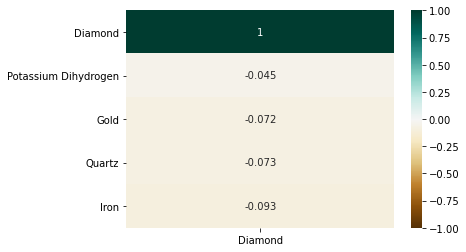

In [11]:
heatmap = sns.heatmap(df.corr()[['Diamond']].sort_values(by='Diamond', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Those correlations was expected, as we can see the diamond and the potassium djydrogen have a correlation and the most interesting part is that iron and gold got the bigest correlations. That make sense if we understand the phenomenom of raman shift analysis, we use UV light so dim minerals gonna have more correlated intensities than not opaque. 


In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

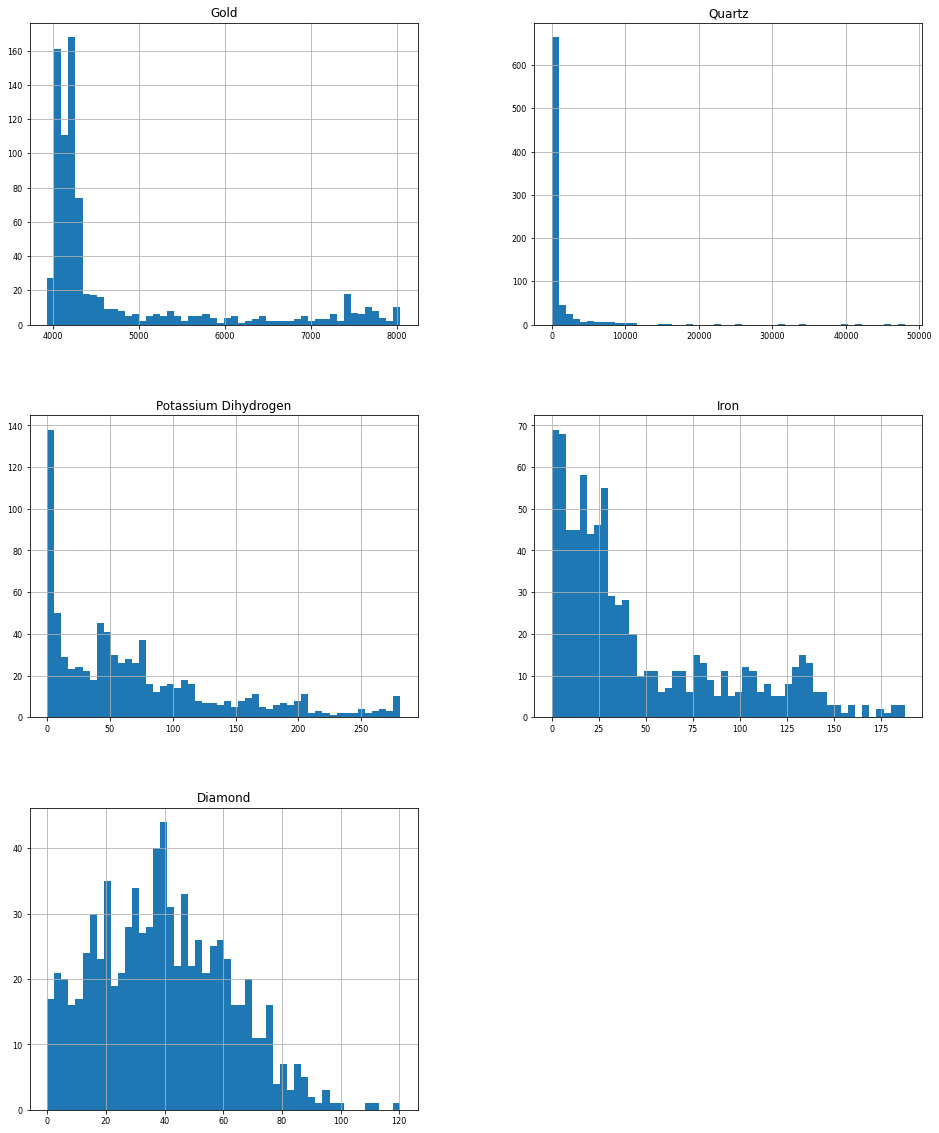

In [13]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);